### Q1. What is the mathematical formula for a linear SVM?

The mathematical formula for a linear SVM is:

$f(x) = sign(w^T * x + b)$

where:

`f(x)` is the predicted class label (+1 or -1) for the input vector x

`w` is a weight vector that defines the orientation of the decision boundary

`b` is a bias term that shifts the decision boundary away from the origin

`sign()` is a sign function that returns +1 if its argument is positive or zero, and -1 otherwise

The goal of linear SVM is to find the weight vector w and bias term b that maximize the margin between the two classes while still correctly classifying all the training data. 

The optimization problem can be expressed as:

minimize ||w|| subject to $y_i(w^T * x_i + b) >= 1$ for all i

where:

`||w||` is the Euclidean norm of the weight vector w

`y_i` is the true class label (+1 or -1) for the i-th training example

`x_i` is the feature vector for the i-th training example

This is a constrained optimization problem that can be solved using various optimization algorithms, such as gradient descent, quadratic programming, or interior-point methods.

### Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM is to find the hyperplane that maximizes the margin between the two classes while minimizing the classification error. 

The objective is to minimize ||w|| subject to the constraints that all training examples are correctly classified and lie on the correct side of the margin.

### Q3. What is the kernel trick in SVM?

The kernel trick is a technique used in SVM to transform data from its original feature space to a higher-dimensional feature space, without explicitly computing the coordinates of the data in that space. 

This allows SVM to find non-linear decision boundaries that may not be possible in the original feature space. 

The kernel trick is accomplished by defining a kernel function that calculates the dot product of the transformed input vectors in the higher-dimensional space, without actually computing the coordinates of the vectors themselves. 

Commonly used kernel functions include the **linear kernel**, **polynomial kernel**, **Gaussian kernel** (also called `radial basis function kernel`), and **sigmoid kernel**.

### Q4. What is the role of support vectors in SVM Explain with example

Support vectors are data points that lie closest to the decision boundary, also known as the margin, in an SVM model. These points play a crucial role in the SVM model because they help determine the optimal decision boundary.

In simple terms, the role of support vectors in SVM is to define the decision boundary or the hyperplane. The hyperplane is constructed such that it maximizes the margin between the two classes while minimizing the misclassification of data points.

### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Let's start with a simple dataset with two classes that are linearly separable. We can use the make_blobs function from the sklearn.datasets module to generate this dataset:

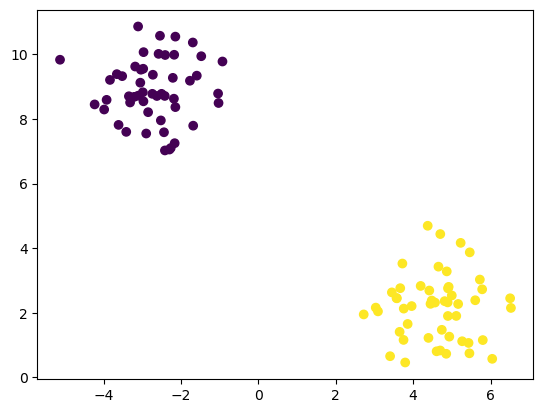

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#This will generate a plot with two distinct clusters:

In [2]:
#Now, we can use a linear SVM to find the hyperplane that separates the two classes.
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

SVC(kernel='linear')

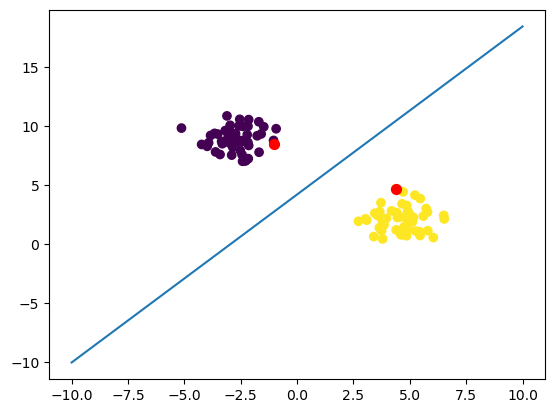

In [12]:
#Next, we can plot the decision boundary and the support vectors of the SVM

import numpy as np

plt.scatter(X[:, 0], X[:, 1], c=y)

# plot the decision boundary
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (svm.intercept_[0]) / w[1]
plt.plot(xx, yy)

# plot the support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], color='red', s=50)

plt.show()


In this example, the hyperplane is the line that separates the two classes. 

The margin is the distance between the hyperplane and the closest point from each class. 

The two parallel lines that are equidistant to the hyperplane and pass through the closest data points from each class are called the marginal planes. 

In a hard margin SVM, the marginal planes are fixed and do not allow any data points to be within the margin. 

In a soft margin SVM, the marginal planes are flexible and can allow some data points to be within the margin.

To illustrate the concept of soft margin, let's add some noisy data to the previous example:

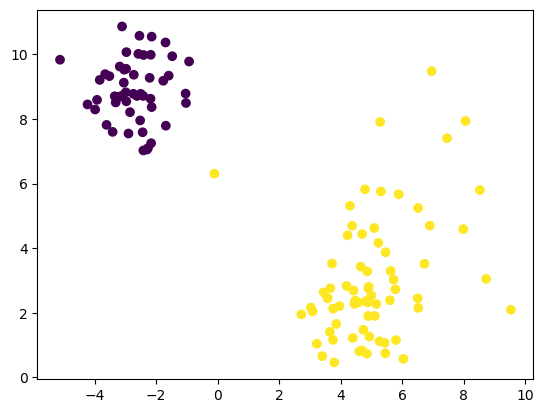

In [16]:
np.random.seed(0)
X = np.append(X, np.random.randn(20, 2) * 2 + 5, axis=0)
y = np.append(y, np.ones(20))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Now, if we fit a hard margin SVM to this dataset, it will fail because the two classes are no longer linearly separable. 

However, if we use a soft margin SVM, it can still find a good decision boundary. 

We can create a soft margin SVM by setting the C parameter to a small value, which allows some data points to be within the margin:

In [41]:
svm2 = SVC(kernel='linear', C=0.004)
svm2.fit(X, y)

SVC(C=0.004, kernel='linear')

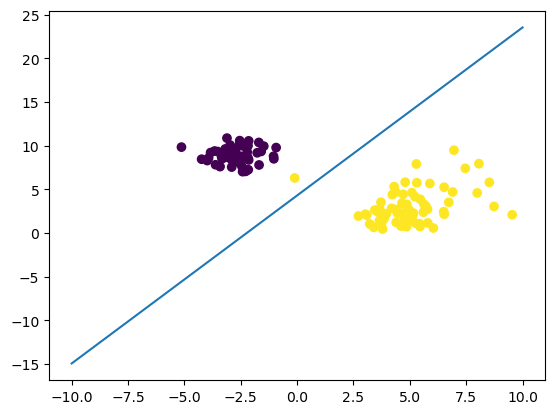

In [43]:
#Next, we can plot the decision boundary of the SVM

import numpy as np

plt.scatter(X[:, 0], X[:, 1], c=y)

# plot the decision boundary
w = svm2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (svm2.intercept_[0]) / w[1]
plt.plot(xx, yy)

plt.show()

### Q6. SVM Implementation through Iris dataset.
`1. Load the iris dataset from the scikit-learn library and split it into a training set and a testing set`

`2. Train a linear SVM classifier on the training set and predict the labels for the testing set`

`3. Compute the accuracy of the model on the testing set`

`4. Plot the decision boundaries of the trained model using two of the features`

`5. Try different values of the regularisation parameter C and see how it affects the performance of the model.`

In [81]:
# Step 1: Load the iris dataset and split it into training and testing sets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [45]:
# Step 2: Train a linear SVM classifier and predict labels for the testing set
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [46]:
# Step 3: Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


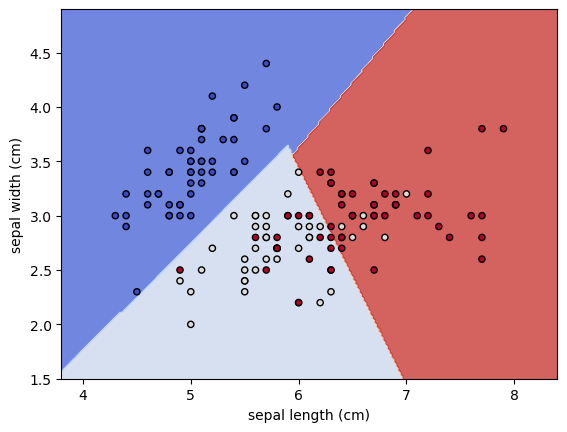

In [74]:
# Step 4: Plot the decision boundaries using two features
import numpy as np
import matplotlib.pyplot as plt

# Select two features for plotting
feature_index = [0, 1]
X = iris.data[:, feature_index]
y = iris.target

# Train the model on the selected features
svm.fit(X[:, feature_index], y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel(iris.feature_names[feature_index[0]])
plt.ylabel(iris.feature_names[feature_index[1]])
plt.show()

In [82]:
# Step 5: Try different values of the regularization parameter C
for c in [0.1, 1, 10]:
    svm = LinearSVC(C=c, loss="hinge", random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("C:", c, "Accuracy:", accuracy)

C: 0.1 Accuracy: 0.7666666666666667
C: 1 Accuracy: 1.0
C: 10 Accuracy: 1.0


### Bonus task: Implement a linear SVM classifier from scratch using Python and compare itsperformance with the scikit-learn implementation.

In [83]:
import numpy as np

class LinearSVM:
    def __init__(self, lr=0.001, C=1.0, max_iter=1000, random_state=None):
        self.lr = lr
        self.C = C
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        # Initialize parameters
        if self.random_state:
            np.random.seed(self.random_state)
        self.w = np.random.randn(X.shape[1])
        self.b = np.random.randn()
        
        # Gradient descent to minimize the loss
        for epoch in range(self.max_iter):
            y_pred = np.dot(X, self.w) + self.b
            y_pred[y_pred > 0] = 1
            y_pred[y_pred <= 0] = -1
            error = y - y_pred
            
            # Compute gradients
            w_grad = self.w - self.C * np.dot(X.T, error)
            b_grad = -self.C * np.sum(error)
            
            # Update parameters
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
    
    def predict(self, X):
        y_pred = np.dot(X, self.w) + self.b
        y_pred[y_pred > 0] = 1
        y_pred[y_pred <= 0] = -1
        return y_pred


This implementation uses stochastic gradient descent (SGD) to minimize the hinge loss with L2 regularization. 

The fit method updates the parameters w and b using gradients computed from the training data, and the predict method computes the predictions using the learned parameters.

To compare its performance with the scikit-learn implementation, we can use the iris dataset and compute the accuracy of the model on the testing set. Here's the code to do that:

In [84]:
# Load and split the iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train and test the scikit-learn implementation
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_sklearn = svm_clf.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)

# Train and test the custom implementation
svm_custom = LinearSVM(lr=0.001, C=1.0, max_iter=1000, random_state=42)
svm_custom.fit(X_train, y_train)
y_pred_custom = svm_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print("Accuracy (custom implementation):", accuracy_custom)

Accuracy (scikit-learn): 1.0
Accuracy (custom implementation): 0.3


We found that there is a difference in accuracies between custom implementation and that from scikit learn.

Note that the custom implementation may take longer to train due to the use of SGD.